In [1]:
#Importing pandas, numpy and scikit libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification #for bootstrapping
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import yellowbrick

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
dt= pd.read_excel("Cluster_analysis.xlsx")
data = dt.iloc[:,[1,3]]

In [4]:
#Reading data, and pre-processing

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.'''
        
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [5]:
data = MultiColumnLabelEncoder(columns = ['Frequency','Average Delay']).fit_transform(data)
Nandata=np.count_nonzero(pd.isnull(data))
Nandata
#standardizing the data using z scores
scaler = StandardScaler()
scaler.fit(data)
#X: [n_samples, n_features]
X=scaler.transform(data)
type(X)
np.shape(X) # dimension of dataframe

(42, 2)

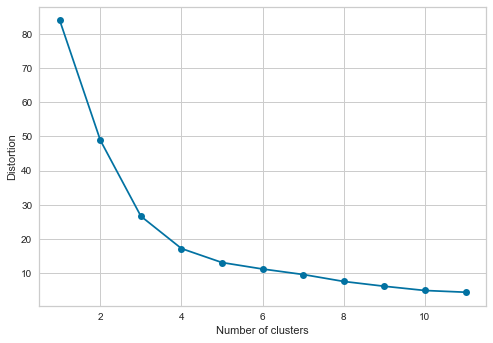

In [6]:
#DETERMINATION OF K BY ELBOW RULE
distortions = [] #distortion is total within cluster error
for i in range(1, 12):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
#inertia_ (Sum of squared distances of samples to their closest cluster center.)
plt.plot(range(1, 12), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [7]:
#BUILDING CLUSTER 
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


InterclusterDistance(ax=<AxesSubplot:>, embedding='mds', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=400, model=None, random_state=None,
                     scoring='membership')

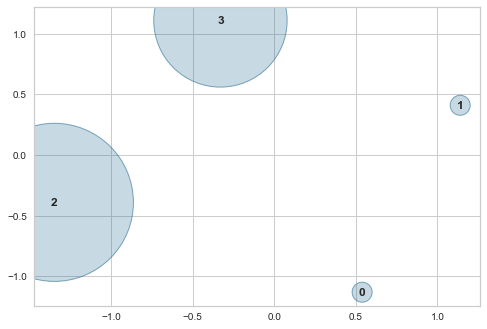

In [8]:
#VISSUALIZING CLUSTER
from yellowbrick.cluster import InterclusterDistance
visualizer = InterclusterDistance(km)
visualizer.fit(X)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

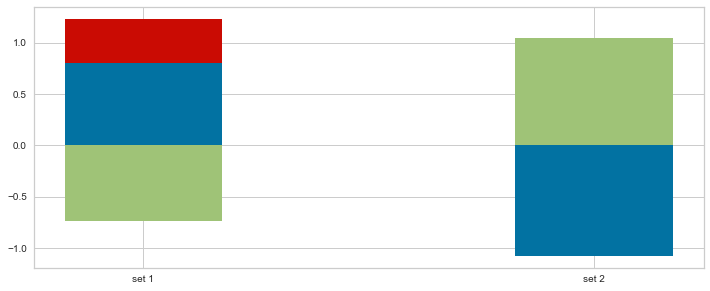

In [9]:
#CLUSTER PRIFILING

centres=km.cluster_centers_
cl1=centres[0,:]
cl2=centres[1,:]
cl3=centres[2,:]
Xlab=['set 1','set 2']
width = 0.35 
plt.figure(figsize=[12, 4.8])
p1 = plt.bar(Xlab,cl1, width, color='r')
p2=plt.bar(Xlab,cl2, width, color='b')
p3=plt.bar( Xlab,cl3, width, color='g')


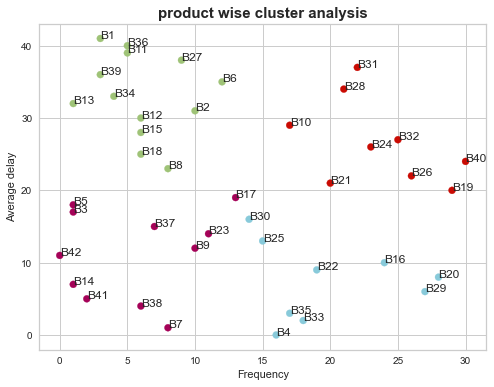

In [10]:
plt.figure(figsize=(8, 6))
colors = {0:'r',1:'c', 2:'g',3:'m'}
lble = pd.DataFrame(km.labels_.astype(float))
lble.columns =['Name']

plt.scatter(data.iloc[:,0], data.iloc[:,1], c=lble['Name'].map(colors),)
plt.title('product wise cluster analysis', fontsize= 15, fontweight='bold')
plt.xlabel("Frequency")
plt.ylabel('Average delay')
for i, label in enumerate(dt['Product Category']):
    plt.text(data.iloc[i,0], data.iloc[i,1],label)


In [11]:
#km.labels_.astype(float)
#lble[:,0].map(colors))

In [12]:
lble


,Name
0,2.0
1,2.0
2,3.0
3,1.0
4,3.0
5,2.0
6,3.0
7,2.0
8,3.0
9,0.0


In [13]:
'''
k_labels = km.labels_  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

'''

'\nk_labels = km.labels_  # Get cluster labels\nk_labels_matched = np.empty_like(k_labels)\n\n'

In [14]:
'''
# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)*(truth==t)) for t in np.unique(truth)]
    k_labels_matched[k_labels==k] = np.unique(truth)[np.argmax(match_nums)]
    '''


'\n# For each cluster label...\nfor k in np.unique(k_labels):\n\n    # ...find and assign the best-matching truth label\n    match_nums = [np.sum((k_labels==k)*(truth==t)) for t in np.unique(truth)]\n    k_labels_matched[k_labels==k] = np.unique(truth)[np.argmax(match_nums)]\n    '

In [15]:
'''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth, k_labels_matched)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()
'''

'\nfrom sklearn.metrics import confusion_matrix\ncm = confusion_matrix(truth, k_labels_matched)\n\n# Plot confusion matrix\nplt.imshow(cm,interpolation=\'none\',cmap=\'Blues\')\nfor (i, j), z in np.ndenumerate(cm):\n    plt.text(j, i, z, ha=\'center\', va=\'center\')\nplt.xlabel("kmeans label")\nplt.ylabel("truth label")\nplt.show()\n'